<a href="https://colab.research.google.com/github/vikasv123/Student-Placement-Predictiion/blob/main/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn import svm
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading Data

In [ ]:
data=pd.read_csv(r"/content/collegePlace.csv")
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


# Data Analysis and Visualization

In [ ]:
data.shape

(2966, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
data["Age"].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [ ]:
print(data["Age"].min())
print(data["Age"].max())

19
30


In [ ]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data["Stream"].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
data["Internships"].unique()

array([1, 0, 2, 3])

In [ ]:
data["CGPA"].unique()

array([8, 7, 6, 9, 5])

In [ ]:
data["Hostel"].unique()

array([1, 0])

In [ ]:
data["HistoryOfBacklogs"].unique()

array([1, 0])

In [ ]:
data["PlacedOrNot"].unique()

array([1, 0])

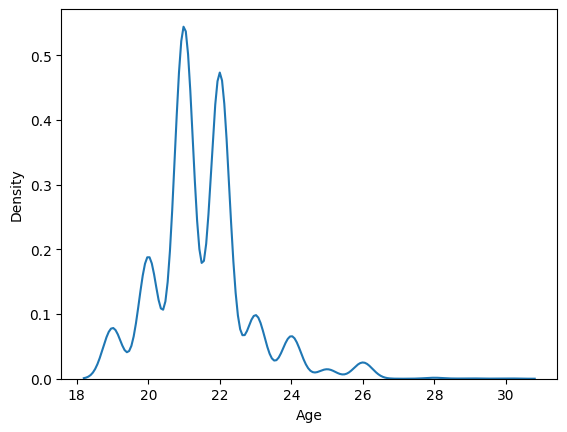

In [ ]:
# VISUALIZATION
sns.kdeplot(data["Age"])
plt.show()

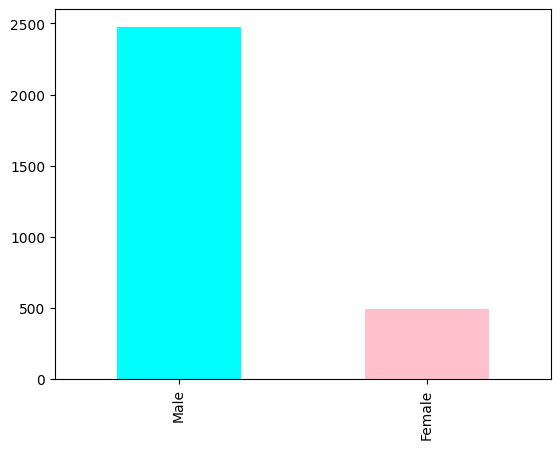

In [ ]:
data["Gender"].value_counts().plot.bar(color=["aqua","pink"])
plt.show()

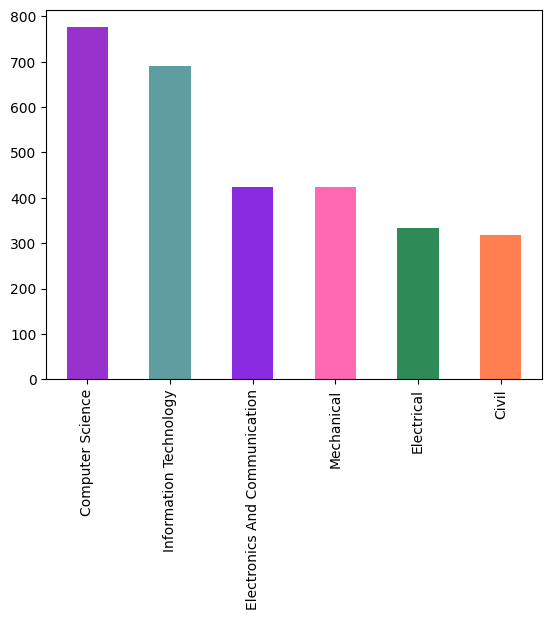

In [ ]:
data["Stream"].value_counts().plot.bar(color=["darkorchid","cadetblue","blueviolet","hotpink","seagreen","coral"])
plt.show()

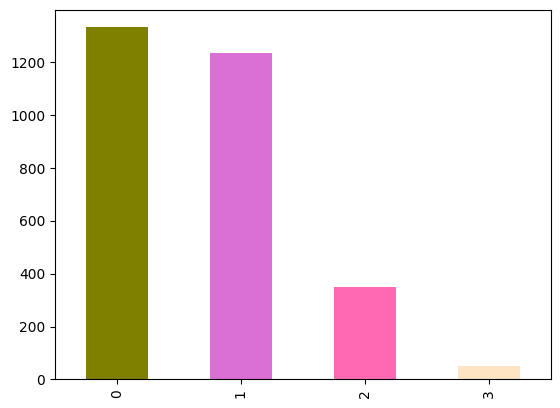

In [ ]:
data["Internships"].value_counts().plot.bar(color=["olive","orchid","hotpink","bisque"])
plt.show()

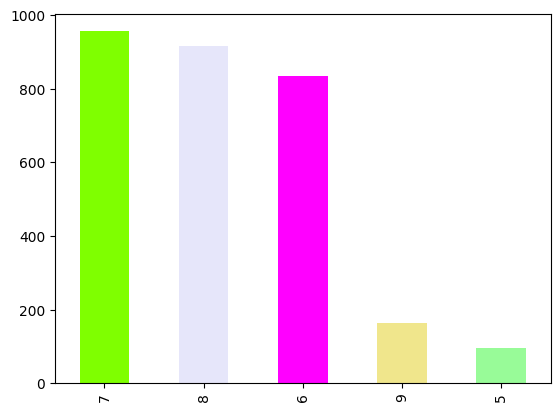

In [ ]:
data["CGPA"].value_counts().plot.bar(color=["chartreuse","lavender","magenta","khaki","palegreen"])
plt.show()

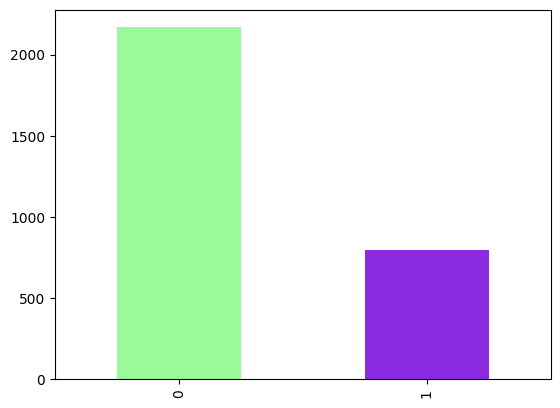

In [ ]:
data["Hostel"].value_counts().plot.bar(color=["palegreen","blueviolet"])
plt.show()

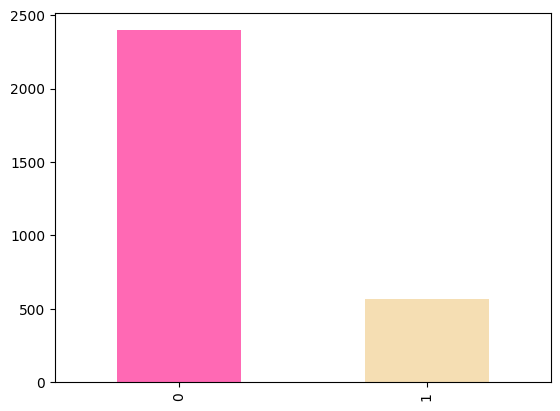

In [ ]:
data["HistoryOfBacklogs"].value_counts().plot.bar(color=["hotpink","wheat"])
plt.show()

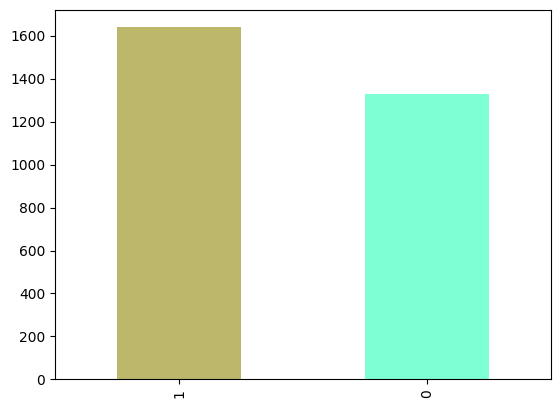

In [ ]:
data["PlacedOrNot"].value_counts().plot.bar(color=["darkkhaki","aquamarine"])
plt.show()

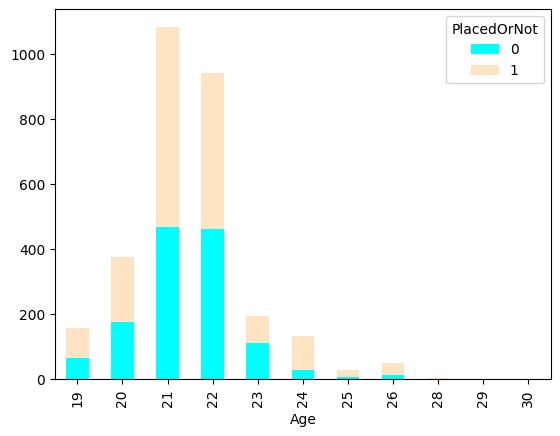

In [ ]:
data.groupby('Age')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["aqua","bisque"])
plt.show()

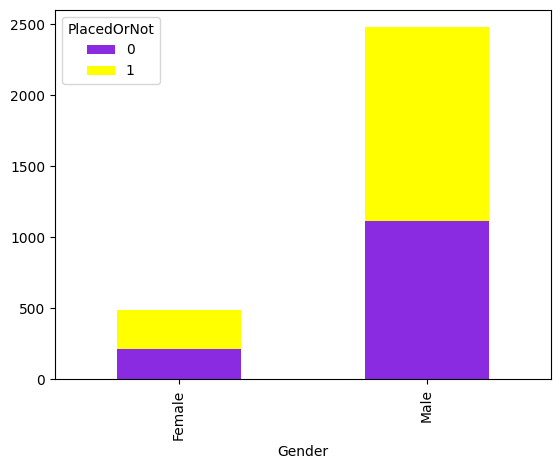

In [ ]:
data.groupby('Gender')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["blueviolet","yellow"])
plt.show()

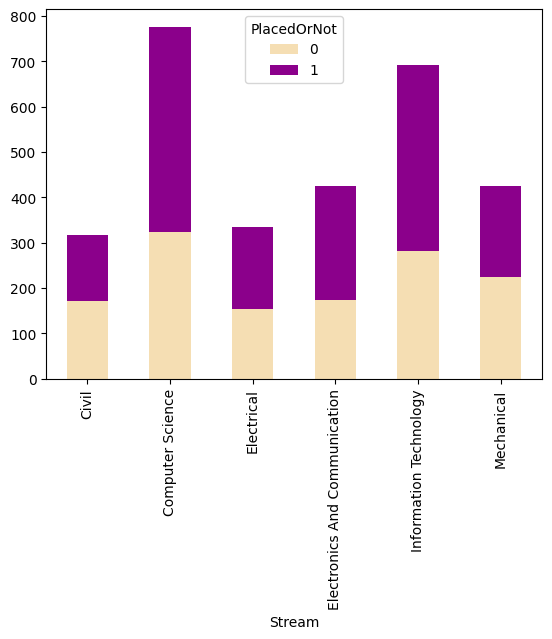

In [ ]:
data.groupby('Stream')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["wheat","darkmagenta"])
plt.show()

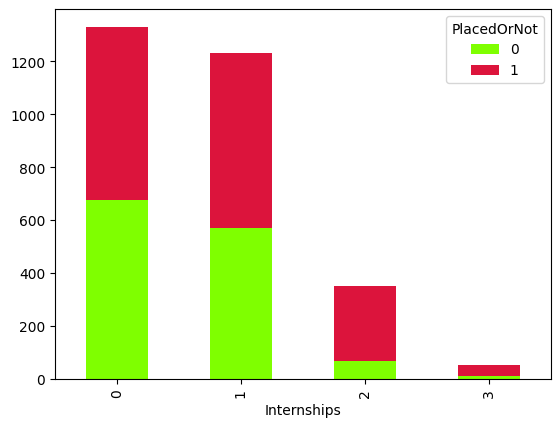

In [ ]:
data.groupby('Internships')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["chartreuse","crimson"])
plt.show()

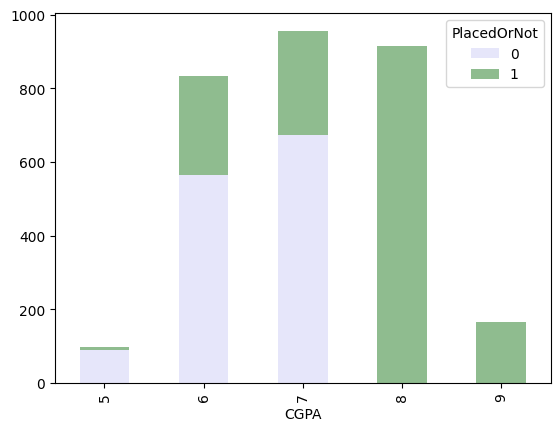

In [ ]:
data.groupby('CGPA')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["lavender","darkseagreen"])
plt.show()

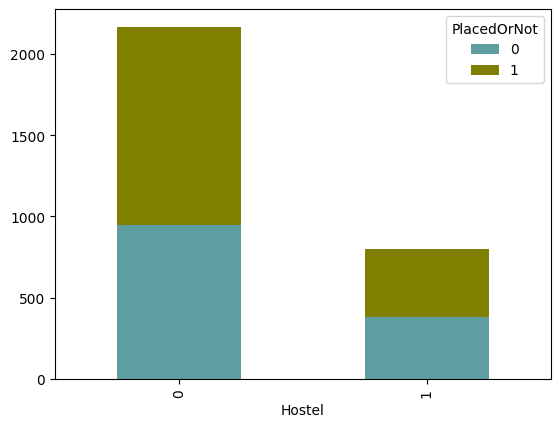

In [ ]:
data.groupby('Hostel')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["cadetblue","olive"])
plt.show()

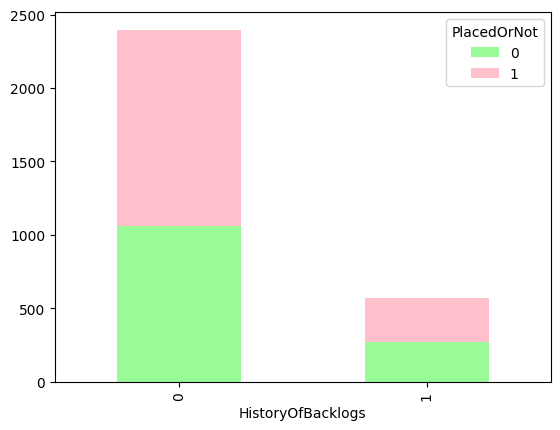

In [ ]:
data.groupby('HistoryOfBacklogs')['PlacedOrNot'].value_counts().unstack().plot(kind='bar',stacked=True,color=["palegreen","pink"])
plt.show()

# Replace 

In [ ]:
data["Gender"].replace("Female",0,inplace=True)
data["Gender"].replace("Male",1,inplace=True)

data["Stream"].replace("Electronics And Communication",1,inplace=True)
data["Stream"].replace("Computer Science",2,inplace=True)
data["Stream"].replace("Information Technology",3,inplace=True)
data["Stream"].replace("Mechanical",4,inplace=True)
data["Stream"].replace("Electrical",5,inplace=True)
data["Stream"].replace("Civil",6,inplace=True)


In [ ]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,8,1,1,1
1,21,0,2,0,7,1,1,1
2,22,0,3,1,6,0,0,1
3,21,1,3,0,8,0,1,1
4,22,1,4,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0,0
2962,23,1,4,1,7,1,0,0
2963,22,1,3,1,7,0,0,0
2964,22,1,2,1,7,0,0,0


In [ ]:
# data.to_csv("CSV/collegePlacement_cleanData.csv")

In [ ]:
# HeatMap

In [ ]:
d=data.corr()
d

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.021538,-0.024072,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,-0.021538,1.000000,0.091570,-0.081526,-0.003512,-0.200254,0.026153,-0.006705
Stream,-0.024072,0.091570,1.000000,-0.129596,0.000693,0.155241,-0.016414,-0.081742
Internships,0.006552,-0.081526,-0.129596,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,-0.003512,0.000693,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,-0.200254,0.155241,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,0.026153,-0.016414,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,-0.006705,-0.081742,0.179334,0.588648,-0.038182,-0.022337,1.000000


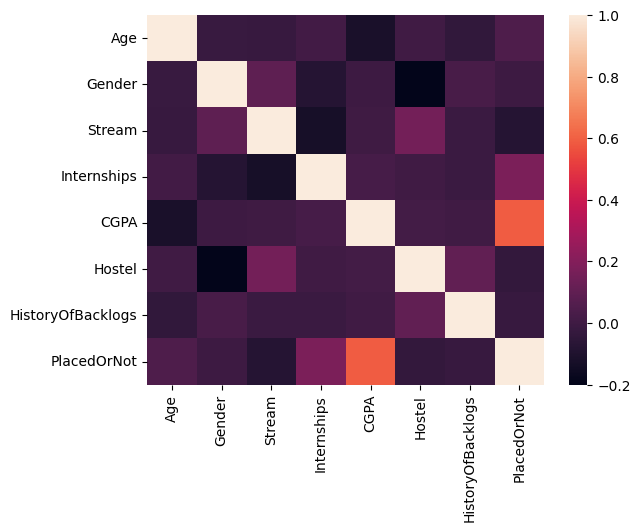

In [ ]:
sns.heatmap(d)
plt.show()

In [ ]:
# pairplot

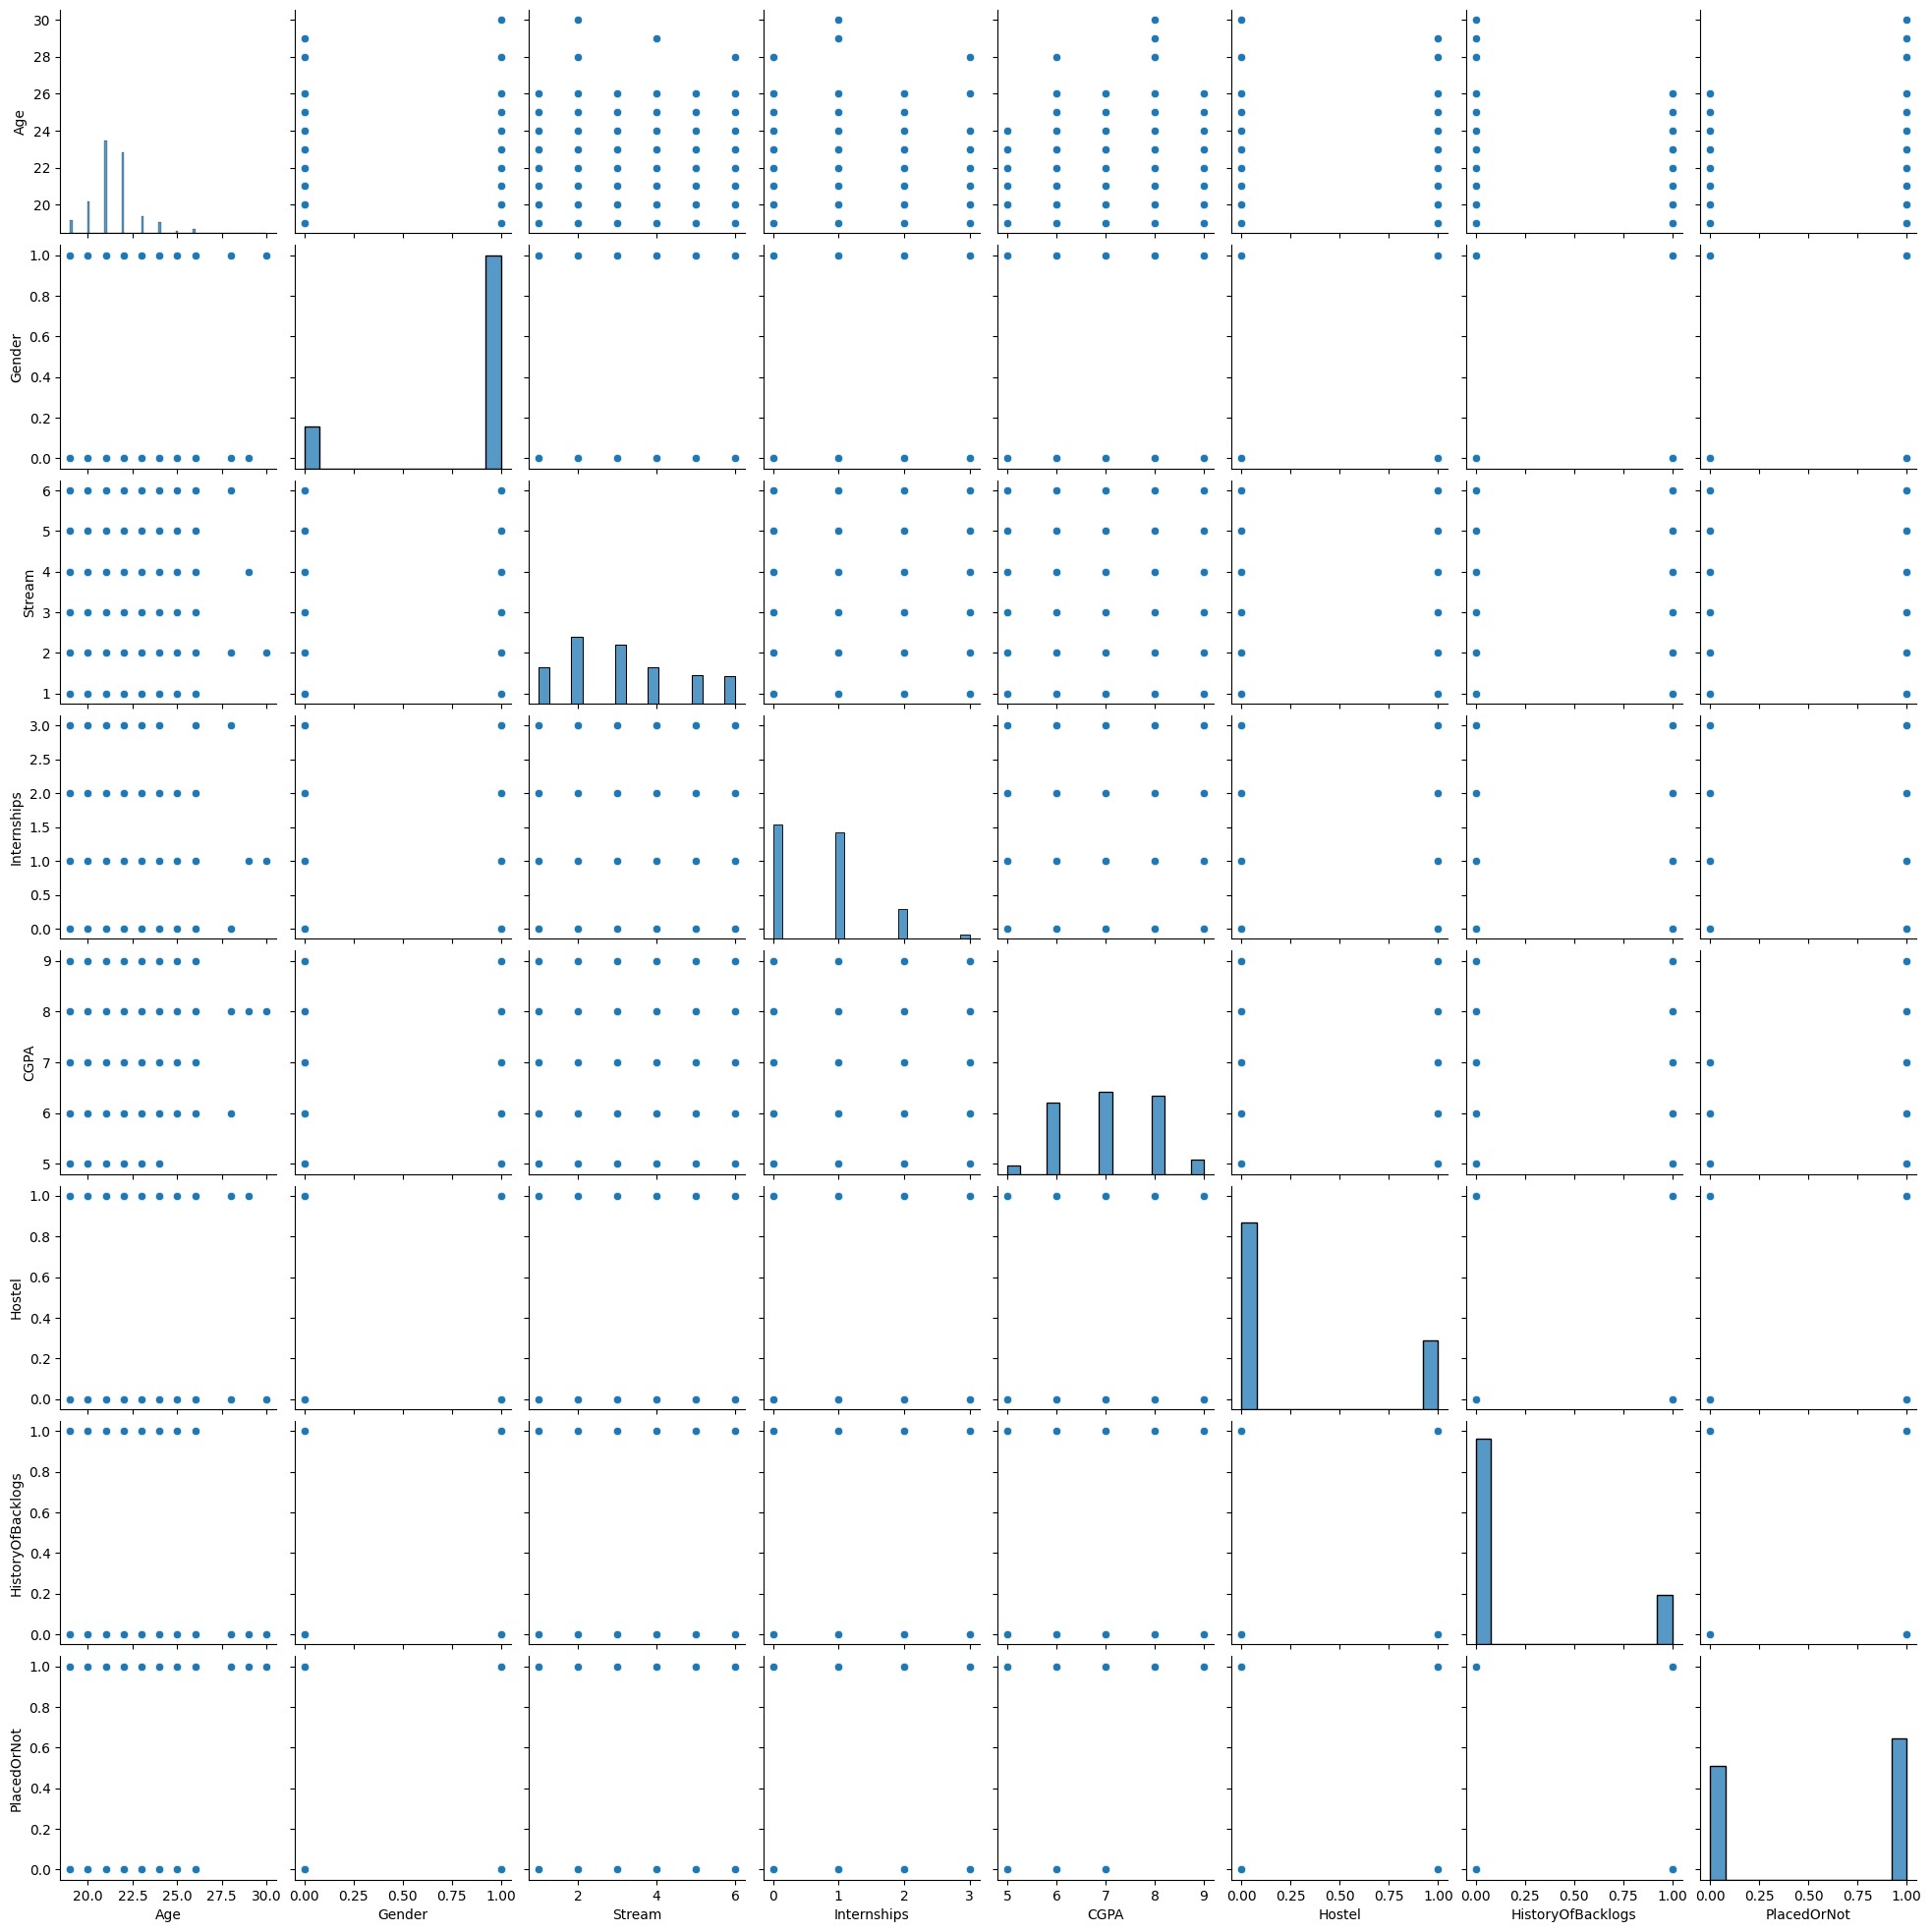

In [ ]:
sns.pairplot(data)
plt.show()

# Convert dataset into numpy array

In [ ]:
data=data.values
data

array([[22,  1,  1, ...,  1,  1,  1],
       [21,  0,  2, ...,  1,  1,  1],
       [22,  0,  3, ...,  0,  0,  1],
       ...,
       [22,  1,  3, ...,  0,  0,  0],
       [22,  1,  2, ...,  0,  0,  0],
       [23,  1,  6, ...,  0,  0,  1]])

# Split the data

In [ ]:
x=data[:,:-2]
y=data[:,-1]
print("Shape of x :",x.shape)
print("Shape of y :",y.shape)

Shape of x : (2966, 6)
Shape of y : (2966,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,shuffle=True, random_state=42)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (2372, 6)
y_train :  (2372,)
x_test :  (594, 6)
y_test :  (594,)


# Different Types of Models

## i) Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction1=model.predict(x_test)
prediction1

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
accuracy1=(accuracy_score(y_test,prediction1))*100
print(accuracy1,"%")

71.71717171717171 %


[[193  87]
 [ 81 233]]


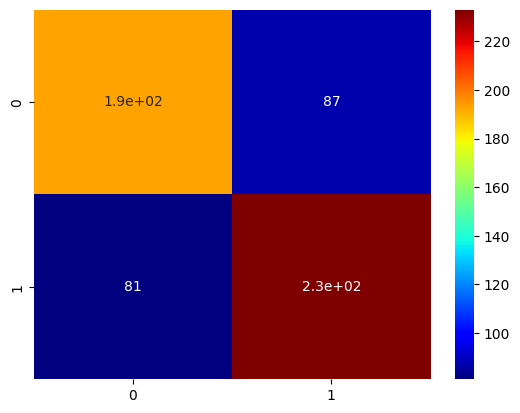

In [ ]:
confusion1=confusion_matrix(y_test,prediction1)
print(confusion1)
sns.heatmap(confusion1, cmap="jet", annot=True)
plt.show()

In [ ]:
classification1=classification_report(y_test,prediction1)
classification1

'              precision    recall  f1-score   support\n\n           0       0.70      0.69      0.70       280\n           1       0.73      0.74      0.74       314\n\n    accuracy                           0.72       594\n   macro avg       0.72      0.72      0.72       594\nweighted avg       0.72      0.72      0.72       594\n'

## ii) Support Vector Machine

In [ ]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
prediction2=model.predict(x_test)
prediction2

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
accuracy2=(accuracy_score(y_test,prediction2))*100
print(accuracy2,"%")

73.73737373737373 %


[[210  70]
 [ 86 228]]


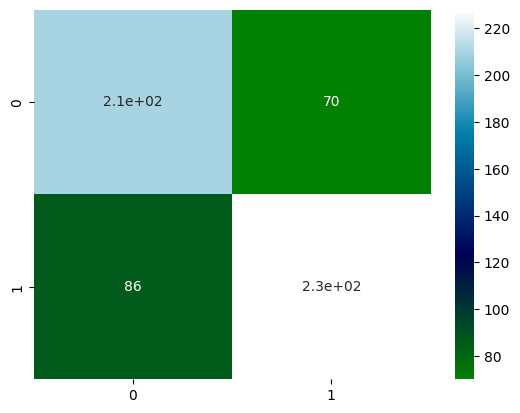

In [ ]:
confusion2=confusion_matrix(y_test,prediction2)
print(confusion2)
sns.heatmap(confusion2, cmap="ocean", annot=True)
plt.show()

In [ ]:
classification2=classification_report(y_test,prediction2)
classification2

'              precision    recall  f1-score   support\n\n           0       0.71      0.75      0.73       280\n           1       0.77      0.73      0.75       314\n\n    accuracy                           0.74       594\n   macro avg       0.74      0.74      0.74       594\nweighted avg       0.74      0.74      0.74       594\n'

## iii) Decision Tree Classifier

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction3=model.predict(x_test)
prediction3

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
accuracy3=(accuracy_score(y_test,prediction3))*100
print(accuracy3,"%")

88.72053872053873 %


[[265  15]
 [ 52 262]]


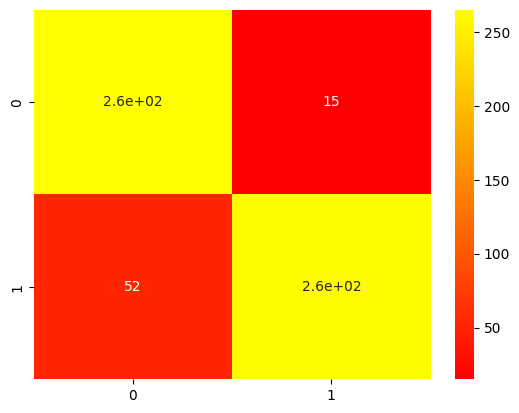

In [ ]:
confusion3=confusion_matrix(y_test,prediction3)
print(confusion3)
sns.heatmap(confusion3, cmap="autumn", annot=True)
plt.show()

In [ ]:
classification3=classification_report(y_test,prediction3)
classification3

'              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89       280\n           1       0.95      0.83      0.89       314\n\n    accuracy                           0.89       594\n   macro avg       0.89      0.89      0.89       594\nweighted avg       0.89      0.89      0.89       594\n'

## iv) Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
prediction4 = model.predict(x_test)
prediction4

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
accuracy4=(accuracy_score(y_test,prediction4))*100
print(accuracy4,"%")

88.72053872053873 %


[[261  19]
 [ 48 266]]


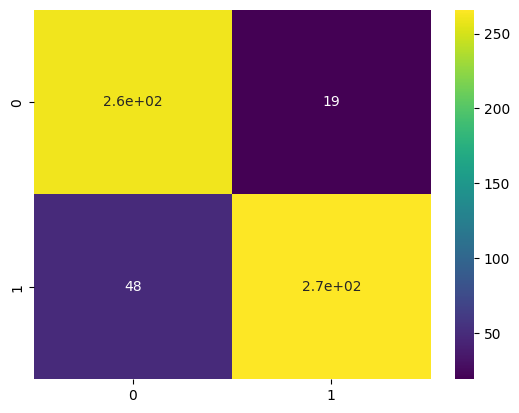

In [ ]:
confusion4=confusion_matrix(y_test,prediction4)
print(confusion4)
sns.heatmap(confusion4, cmap="viridis", annot=True)
plt.show()

In [ ]:
classification4=classification_report(y_test,prediction4)
classification4

'              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.89       280\n           1       0.93      0.85      0.89       314\n\n    accuracy                           0.89       594\n   macro avg       0.89      0.89      0.89       594\nweighted avg       0.89      0.89      0.89       594\n'

## v) Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

prediction5=model.predict(x_test)
prediction5

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
accuracy5=(accuracy_score(y_test,prediction5))*100
print(accuracy5,"%")

77.60942760942761 %


[[221  59]
 [ 74 240]]


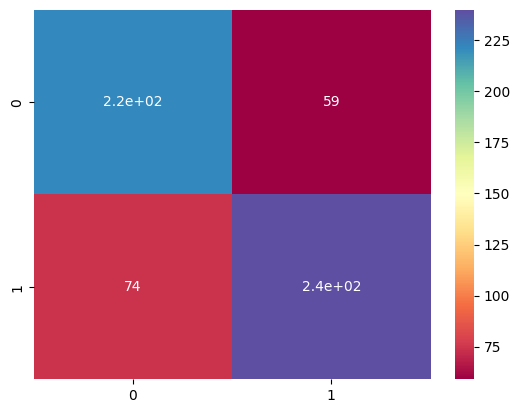

In [ ]:
confusion5=confusion_matrix(y_test,prediction5)
print(confusion5)
sns.heatmap(confusion5, cmap="Spectral", annot=True)
plt.show()

In [ ]:
classification5=classification_report(y_test,prediction5)
classification5

'              precision    recall  f1-score   support\n\n           0       0.75      0.79      0.77       280\n           1       0.80      0.76      0.78       314\n\n    accuracy                           0.78       594\n   macro avg       0.78      0.78      0.78       594\nweighted avg       0.78      0.78      0.78       594\n'

## vii) KNeighbors Classifier

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction6=model.predict(x_test)
prediction6

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
accuracy6=(accuracy_score(y_test,prediction6))*100
print(accuracy6,"%")

85.85858585858585 %


[[253  27]
 [ 57 257]]


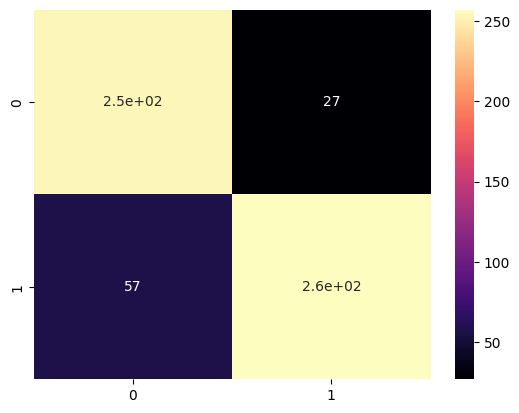

In [ ]:
confusion6=confusion_matrix(y_test,prediction6)
print(confusion6)
sns.heatmap(confusion6, cmap="magma", annot=True)
plt.show()

In [ ]:
classification6=classification_report(y_test,prediction6)
classification6

'              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86       280\n           1       0.90      0.82      0.86       314\n\n    accuracy                           0.86       594\n   macro avg       0.86      0.86      0.86       594\nweighted avg       0.86      0.86      0.86       594\n'

In [ ]:
model=KNeighborsClassifier(n_neighbors=10,p=2,metric="minkowski")
model.fit(x_train,y_train)

prediction7=model.predict(x_test)
prediction7

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
accuracy7=(accuracy_score(y_test,prediction7))*100
print(accuracy7,"%")

85.52188552188552 %


In [ ]:
model=KNeighborsClassifier(n_neighbors=10,p=1,metric="euclidean")
model.fit(x_train,y_train)

prediction8=model.predict(x_test)
prediction8

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
accuracy8=(accuracy_score(y_test,prediction8))*100
print(accuracy8,"%")

85.52188552188552 %


# Highest Accuracy

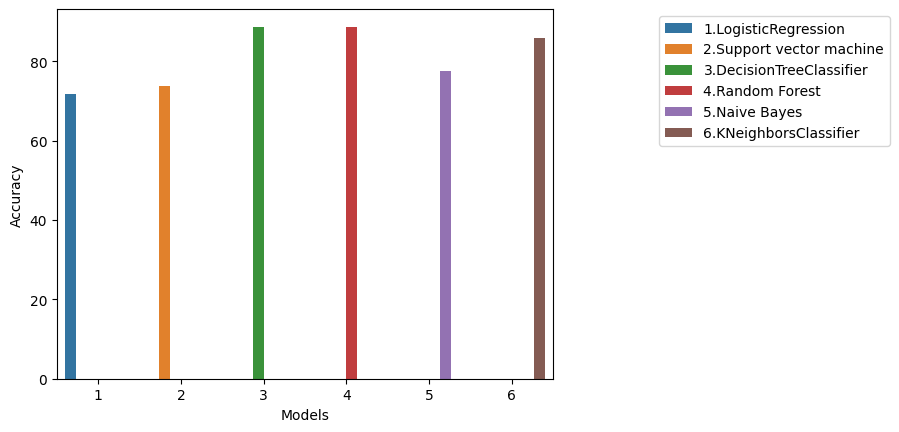

88.72053872053873


In [ ]:
Highest_accuracy=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]
num=[1,2,3,4,5,6]
Models=["1.LogisticRegression","2.Support vector machine","3.DecisionTreeClassifier","4.Random Forest",
        "5.Naive Bayes","6.KNeighborsClassifier"]

a=sns.barplot(x=num,y=Highest_accuracy,hue=Models)
a.set(xlabel="Models",ylabel="Accuracy")
a.legend(bbox_to_anchor= (1.2,1))
plt.show()
print(max(Highest_accuracy))

# We can take either Decission Tree Classifier or Random Forest Classifier because these both model has same accuracy i.e. 88.72053872053873 %

In [ ]:
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,x,y,cv=10,scoring="accuracy")
print(scores)

[0.78451178 0.83838384 0.80808081 0.76430976 0.87542088 0.78787879
 0.86486486 0.84459459 0.93243243 0.91554054]


In [ ]:
print(scores.mean(),scores.std())

0.8416018291018291 0.05353923875689181
